In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
})


POLICY = "ADP"
POLICY = "H2S"
POLICY = "MC"

# Path to the saved CSV
DATA_PATH = f"/home/chris/Desktop/bayesian-security-games/merge_game_trajectories_{POLICY}.csv"


# Load
df = pd.read_csv(DATA_PATH)


# Extract arrays
t = df["t"].values


defender_coords = df[["def_x", "def_y"]].values
attacker_coords = df[["att_x", "att_y"]].values

In [14]:
distances = np.linalg.norm(defender_coords - attacker_coords, axis=1)

# Lane boundaries
l1 = 0.0
l2 = 4.0
l3 = 8.0


# Merge thresholds
W1 = 20.0
W2 = 80.0


# Build vertical axis for road shading
y_vals = np.linspace(
min(defender_coords[:,1].min(), attacker_coords[:,1].min()) - 2,
max(defender_coords[:,1].max(), attacker_coords[:,1].max()) + 2,
400,
)


# Right boundary (static here; replace if tapering dynamically)
right_edge = np.full_like(y_vals, l3)

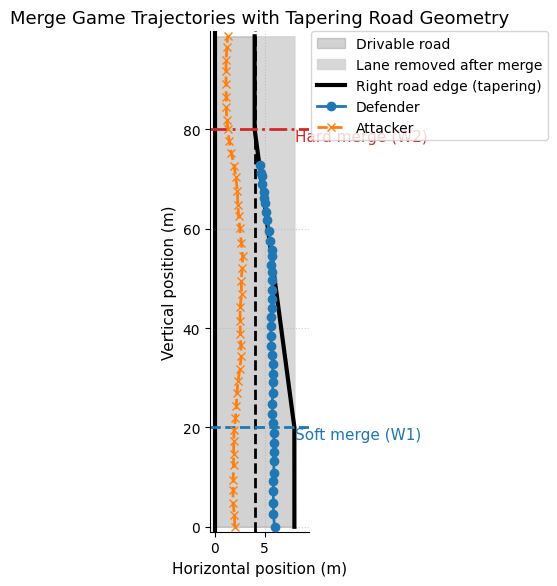

In [15]:
plt.figure(figsize=(8, 6))

# ================= Trajectory bounds =================
y_min = min(defender_coords[:, 1].min(), attacker_coords[:, 1].min(), 0.0)
y_max = max(defender_coords[:, 1].max(), attacker_coords[:, 1].max(), W2)

y_vals = np.linspace(y_min, y_max, 400)

# ================= True tapering right boundary =================
merge_progress = (y_vals - W1) / (W2 - W1)
merge_progress = np.clip(merge_progress, 0.0, 1.0)

right_edge = (1.0 - merge_progress) * l3 + merge_progress * l2

# ================= Road shading =================
plt.fill_betweenx(
    y_vals,
    l1,
    right_edge,
    color="gray",
    alpha=0.35,
    zorder=0,
    label="Drivable road",
)

plt.fill_betweenx(
    y_vals,
    right_edge,
    l3,
    color="lightgray",
    alpha=0.9,
    zorder=1,
    label="Lane removed after merge",
)

# ================= Road boundaries =================
plt.axvline(l1, color="black", linewidth=3)
plt.axvline(l2, color="black", linestyle="--", linewidth=2)

plt.plot(
    right_edge,
    y_vals,
    color="black",
    linewidth=3,
    label="Right road edge (tapering)",
)

# ================= Merge region lines =================
plt.axhline(W1, color="tab:blue", linestyle="--", linewidth=2)
plt.axhline(W2, color="tab:red", linestyle="-.", linewidth=2)

plt.text(l3 + 0.1, W1, "Soft merge (W1)", color="tab:blue", va="top")
plt.text(l3 + 0.1, W2, "Hard merge (W2)", color="tab:red", va="top")

# ================= Trajectories =================
plt.plot(
    defender_coords[:, 0],
    defender_coords[:, 1],
    marker="o",
    linestyle="-",
    linewidth=2,
    color="tab:blue",
    label="Defender",
    zorder=5,
)

plt.plot(
    attacker_coords[:, 0],
    attacker_coords[:, 1],
    marker="x",
    linestyle="--",
    linewidth=2,
    color="tab:orange",
    label="Attacker",
    zorder=5,
)

# ================= Formatting =================
plt.xlabel("Horizontal position (m)")
plt.ylabel("Vertical position (m)")
plt.title("Merge Game Trajectories with Tapering Road Geometry")

plt.xlim(l1 - 0.5, l3 + 1.5)
plt.ylim(y_min - 1.0, y_max + 1.0)

# 1:1 scale (same as original)
plt.gca().set_aspect(0.5, adjustable="box")

plt.grid(True, linestyle=":", alpha=0.6)
plt.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0.0,
    frameon=True,
)

plt.tight_layout()
plt.savefig("car_trajectories_with_taper_1to2.png", dpi=200)
plt.show()


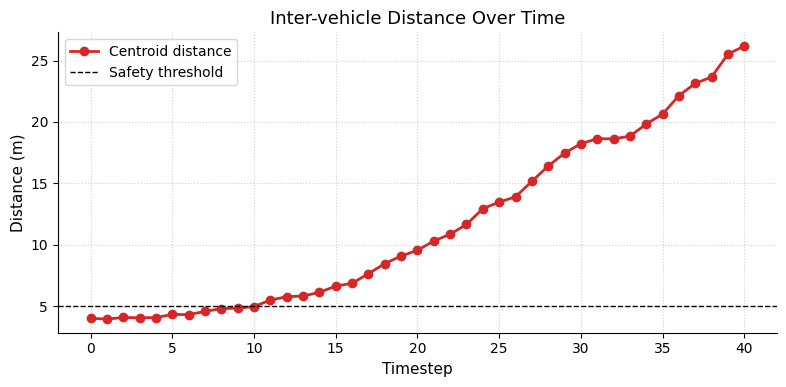

In [16]:
# ---- Standalone distance plot ----
plt.figure(figsize=(8, 4))

plt.plot(
    t,
    distances,
    color="tab:red",
    linewidth=2,
    marker="o",
    label="Centroid distance",
)

# Optional safety threshold
SAFE_DIST = 5.0  # adjust to car_length + margin
plt.axhline(
    SAFE_DIST,
    color="black",
    linestyle="--",
    linewidth=1,
    label="Safety threshold",
)

plt.xlabel("Timestep")
plt.ylabel("Distance (m)")
plt.title("Inter-vehicle Distance Over Time")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.6)

plt.tight_layout()
plt.savefig(f"centroid_distance_{POLICY}.png", dpi=200)
plt.show()

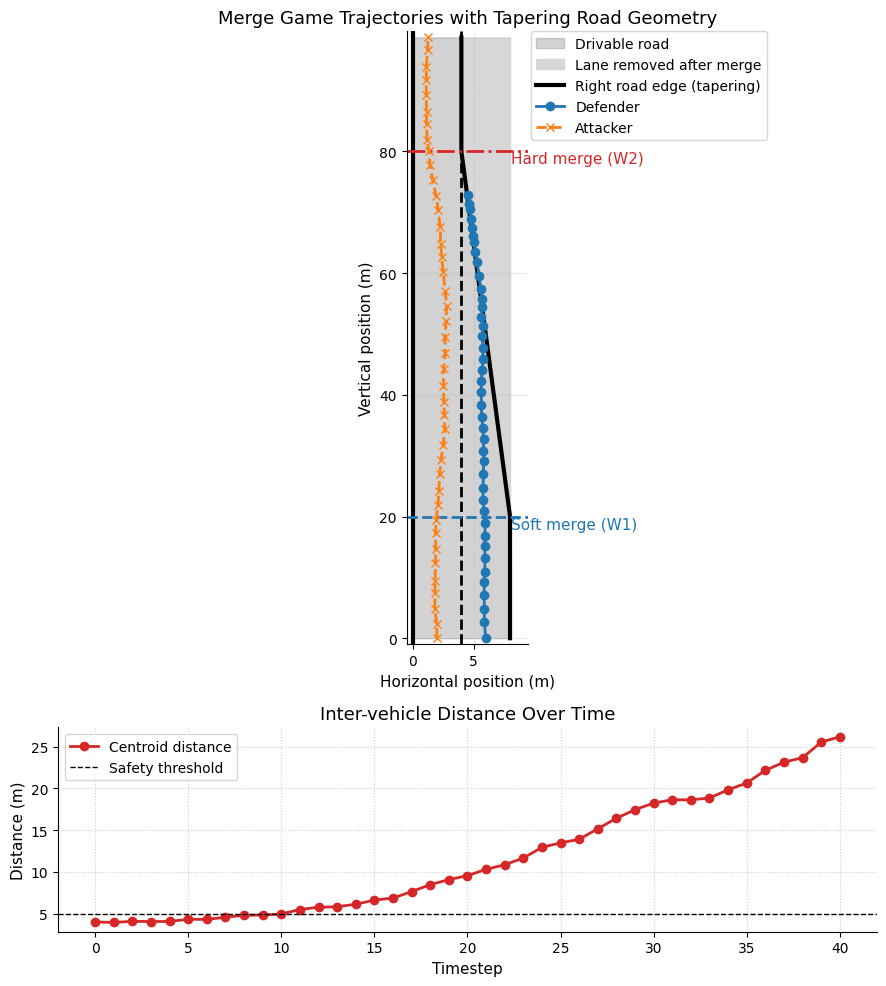

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# ================= Create combined figure =================
fig, (ax_traj, ax_dist) = plt.subplots(
    2, 1,
    figsize=(9, 10),
    gridspec_kw={"height_ratios": [3, 1]},
)

# ================= Trajectory bounds =================
y_min = min(defender_coords[:, 1].min(), attacker_coords[:, 1].min(), 0.0)
y_max = max(defender_coords[:, 1].max(), attacker_coords[:, 1].max(), W2)

y_vals = np.linspace(y_min, y_max, 400)

# ================= True tapering right boundary =================
merge_progress = (y_vals - W1) / (W2 - W1)
merge_progress = np.clip(merge_progress, 0.0, 1.0)

right_edge = (1.0 - merge_progress) * l3 + merge_progress * l2

# ================= Road shading =================
ax_traj.fill_betweenx(
    y_vals,
    l1,
    right_edge,
    color="gray",
    alpha=0.35,
    zorder=0,
    label="Drivable road",
)

ax_traj.fill_betweenx(
    y_vals,
    right_edge,
    l3,
    color="lightgray",
    alpha=0.9,
    zorder=1,
    label="Lane removed after merge",
)

# ================= Road boundaries =================
ax_traj.axvline(l1, color="black", linewidth=3)
ax_traj.axvline(l2, color="black", linestyle="--", linewidth=2)

ax_traj.plot(
    right_edge,
    y_vals,
    color="black",
    linewidth=3,
    label="Right road edge (tapering)",
)

# ================= Merge region lines =================
ax_traj.axhline(W1, color="tab:blue", linestyle="--", linewidth=2)
ax_traj.axhline(W2, color="tab:red", linestyle="-.", linewidth=2)

ax_traj.text(l3 + 0.1, W1, "Soft merge (W1)", color="tab:blue", va="top")
ax_traj.text(l3 + 0.1, W2, "Hard merge (W2)", color="tab:red", va="top")

# ================= Trajectories =================
ax_traj.plot(
    defender_coords[:, 0],
    defender_coords[:, 1],
    marker="o",
    linestyle="-",
    linewidth=2,
    color="tab:blue",
    label="Defender",
    zorder=5,
)

ax_traj.plot(
    attacker_coords[:, 0],
    attacker_coords[:, 1],
    marker="x",
    linestyle="--",
    linewidth=2,
    color="tab:orange",
    label="Attacker",
    zorder=5,
)

# ================= Formatting (top plot) =================
ax_traj.set_xlabel("Horizontal position (m)")
ax_traj.set_ylabel("Vertical position (m)")
ax_traj.set_title("Merge Game Trajectories with Tapering Road Geometry")

ax_traj.set_xlim(l1 - 0.5, l3 + 1.5)
ax_traj.set_ylim(y_min - 1.0, y_max + 1.0)

ax_traj.set_aspect(0.5, adjustable="box")
ax_traj.grid(True, linestyle=":", alpha=0.6)

ax_traj.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 1.0),
    borderaxespad=0.0,
    frameon=True,
)

# ================= Bottom plot: distance =================
ax_dist.plot(
    t,
    distances,
    color="tab:red",
    linewidth=2,
    marker="o",
    label="Centroid distance",
)

SAFE_DIST = 5.0
ax_dist.axhline(
    SAFE_DIST,
    color="black",
    linestyle="--",
    linewidth=1,
    label="Safety threshold",
)

ax_dist.set_xlabel("Timestep")
ax_dist.set_ylabel("Distance (m)")
ax_dist.set_title("Inter-vehicle Distance Over Time")

ax_dist.grid(True, linestyle=":", alpha=0.6)
ax_dist.legend()

# ================= Finalize =================
plt.tight_layout()
plt.savefig(f"merge_game_trajectory_and_distance_{POLICY}.png", dpi=200)
plt.show()


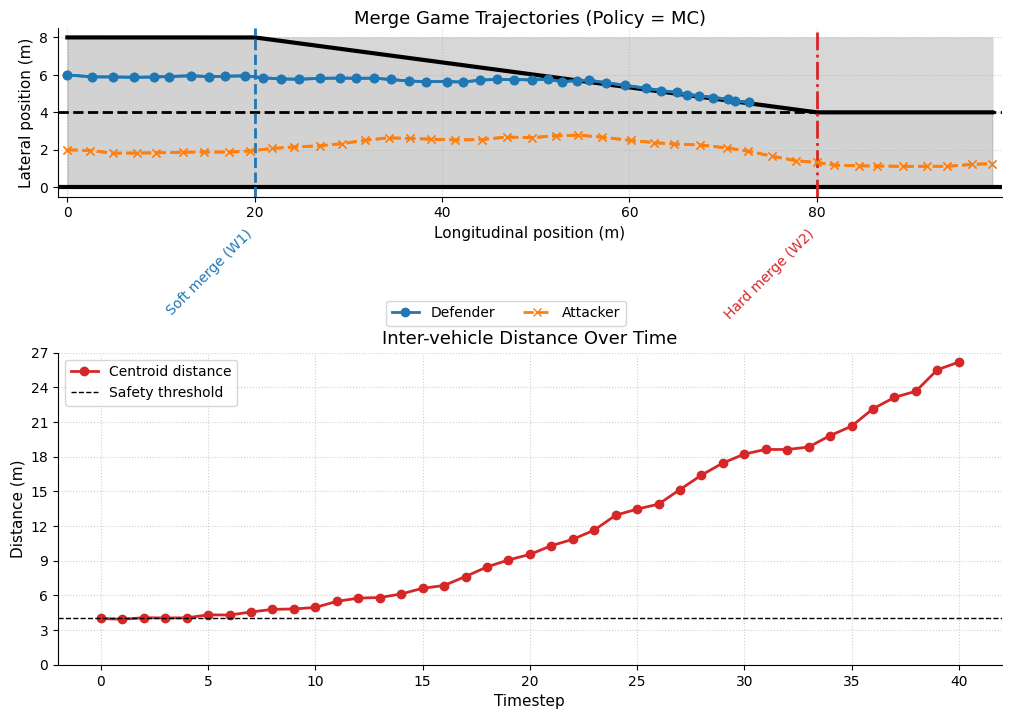

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
})


# ================= Create combined figure =================
# fig, (ax_traj, ax_dist) = plt.subplots(
#     2, 1,
#     figsize=(10, 8),
#     gridspec_kw={"height_ratios": [3, 1]},
# )

fig, (ax_traj, ax_dist) = plt.subplots(
    2,
    1,
    figsize=(10, 8),
    gridspec_kw={"height_ratios": [1.0, 0.8]},
    constrained_layout=True,
)


# ================= Trajectory bounds =================
y_min = min(defender_coords[:, 1].min(), attacker_coords[:, 1].min(), 0.0)
y_max = max(defender_coords[:, 1].max(), attacker_coords[:, 1].max(), W2)

y_vals = np.linspace(y_min, y_max, 400)

# ================= True tapering right boundary =================
merge_progress = (y_vals - W1) / (W2 - W1)
merge_progress = np.clip(merge_progress, 0.0, 1.0)

right_edge = (1.0 - merge_progress) * l3 + merge_progress * l2

# ============================================================
# TOP PLOT — ROAD + TRAJECTORIES (ROTATED)
# Longitudinal position → x-axis
# Lateral position      → y-axis
# ============================================================

# Road shading
ax_traj.fill_between(
    y_vals,           # x = longitudinal
    l1,               # y lower (left edge)
    right_edge,       # y upper (tapering edge)
    color="gray",
    alpha=0.35,
    zorder=0,
    label="Drivable road",
)

ax_traj.fill_between(
    y_vals,
    right_edge,
    l3,
    color="lightgray",
    alpha=0.9,
    zorder=1,
    label="Lane removed after merge",
)

# Road boundaries
ax_traj.axhline(l1, color="black", linewidth=3)
ax_traj.axhline(l2, color="black", linestyle="--", linewidth=2)

ax_traj.plot(
    y_vals,
    right_edge,
    color="black",
    linewidth=3,
    label="Right road edge (tapering)",
)

# Merge region lines (now vertical)
ax_traj.axvline(W1, color="tab:blue", linestyle="--", linewidth=2)
ax_traj.axvline(W2, color="tab:red", linestyle="-.", linewidth=2)

label_y = -0.18  # negative = below axis (tune: -0.10 to -0.25)

ax_traj.text(
    W1,
    label_y,
    "Soft merge (W1)",
    color="tab:blue",
    rotation=45,
    ha="right",
    va="top",
    fontsize=10,
    transform=ax_traj.get_xaxis_transform(),
    clip_on=False,   # <-- critical
)

ax_traj.text(
    W2,
    label_y,
    "Hard merge (W2)",
    color="tab:red",
    rotation=45,
    ha="right",
    va="top",
    fontsize=10,
    transform=ax_traj.get_xaxis_transform(),
    clip_on=False,   # <-- critical
)

# Trajectories (ROTATED)
ax_traj.plot(
    defender_coords[:, 1],  # longitudinal → x
    defender_coords[:, 0],  # lateral      → y
    marker="o",
    linestyle="-",
    linewidth=2,
    color="tab:blue",
    label="Defender",
    zorder=5,
)

ax_traj.plot(
    attacker_coords[:, 1],
    attacker_coords[:, 0],
    marker="x",
    linestyle="--",
    linewidth=2,
    color="tab:orange",
    label="Attacker",
    zorder=5,
)

defender_line, = ax_traj.plot(
    defender_coords[:, 1],
    defender_coords[:, 0],
    marker="o",
    linestyle="-",
    linewidth=2,
    color="tab:blue",
    label="Defender",
    zorder=5,
)

attacker_line, = ax_traj.plot(
    attacker_coords[:, 1],
    attacker_coords[:, 0],
    marker="x",
    linestyle="--",
    linewidth=2,
    color="tab:orange",
    label="Attacker",
    zorder=5,
)



# Formatting (top)
ax_traj.set_xlabel("Longitudinal position (m)")
ax_traj.set_ylabel("Lateral position (m)")
ax_traj.set_title(f"Merge Game Trajectories (Policy = {POLICY})",
                  pad=3)

ax_traj.set_xlim(y_min - 1.0, y_max + 1.0)
ax_traj.set_ylim(l1 - 0.5, l3 + 0.5)

ax_traj.set_aspect(2, adjustable="box")
ax_traj.grid(True, linestyle=":", alpha=0.6)



# ============================================================
# BOTTOM PLOT — DISTANCE VS TIME (UNCHANGED)
# ============================================================

Y_MIN = 0.0
Y_MAX = 27.0

ax_dist.set_ylim(Y_MIN, Y_MAX)
ax_dist.set_yticks(np.linspace(Y_MIN, Y_MAX, 10))


ax_dist.plot(
    t,
    distances,
    color="tab:red",
    linewidth=2,
    marker="o",
    label="Centroid distance",
)

SAFE_DIST = 5.0
ax_dist.axhline(
    4.0,
    color="black",
    linestyle="--",
    linewidth=1,
    label="Safety threshold",
)

ax_dist.set_xlabel("Timestep")
ax_dist.set_ylabel("Distance (m)")
ax_dist.set_title("Inter-vehicle Distance Over Time")

ax_dist.grid(True, linestyle=":", alpha=0.6)
ax_dist.legend()

fig.legend(
    handles=[defender_line, attacker_line],
    labels=["Defender", "Attacker"],
    loc="center",
    bbox_to_anchor=(0.5, 0.5),  # tweak vertically if needed
    ncol=2,
    frameon=True,
)


# ================= Finalize =================
# plt.tight_layout()
plt.savefig(f"merge_demo_{POLICY}.png", dpi=200)
plt.show()
